# Mock exam 3

## Q1 (5 points)

Read the `contact_matrix` file, load its content in a pandas DataFrame object,

Each value is a probability of contact between individual cells, with the cell names listed as row and column header.

In [1]:
import pandas as pd

file_path = 'contact_matrix.csv'

try:
    # index_col=0 tells pandas to use the first column as the index (row labels)
    contact_matrix_df = pd.read_csv(file_path, index_col=0)
    
    print(contact_matrix_df.head())
except FileNotFoundError:
    print("The file was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


          WT_0      WT_1      WT_2      WT_3      WT_4      WT_5      WT_6  \
WT_0  0.459917  0.539432  0.912233  0.343054  0.064512  0.042499  0.676034   
WT_1  0.300486  0.768542  0.596863  0.868911  0.493864  0.255607  0.907498   
WT_2  0.158050  0.722779  0.438621  0.187681  0.199989  0.789568  0.044541   
WT_3  0.679877  0.335380  0.670309  0.017318  0.295681  0.569595  0.236584   
WT_4  0.066717  0.613667  0.417180  0.435564  0.000156  0.914267  0.502659   

          WT_7      WT_8      WT_9  ...     GM_20     GM_21     GM_22  \
WT_0  0.051203  0.908699  0.372505  ...  0.088847  0.310967  0.519286   
WT_1  0.938754  0.345720  0.972183  ...  0.019719  0.668262  0.957818   
WT_2  0.912806  0.662249  0.729083  ...  0.517457  0.472105  0.713963   
WT_3  0.090647  0.190913  0.097098  ...  0.432289  0.465486  0.861133   
WT_4  0.753221  0.173810  0.296293  ...  0.328072  0.963976  0.579833   

         GM_23     GM_24     GM_25     GM_26     GM_27     GM_28     GM_29  
WT_0  0.143641 

## Q2 (10 points)

Compute the mean value in the previously read matrix.

In [2]:
import pandas as pd

mean_value = contact_matrix_df.values.flatten().mean()

print("Mean value of all probabilities in the contact matrix:", mean_value)


Mean value of all probabilities in the contact matrix: 0.4983007165520408


## Q3a (15 points)

The cells are divided in two groups, "WT" and "GM". Compute the mean probability for contacts within each group.

In [3]:
import pandas as pd

wt_columns = [col for col in contact_matrix_df.columns if col.startswith('WT')]
gm_columns = [col for col in contact_matrix_df.columns if col.startswith('GM')]

wt_wt_mean = contact_matrix_df.loc[wt_columns, wt_columns].values.flatten().mean()

gm_gm_mean = contact_matrix_df.loc[gm_columns, gm_columns].values.flatten().mean()

print("Mean contact probability within WT group:", wt_wt_mean)
print("Mean contact probability within GM group:", gm_gm_mean)


Mean contact probability within WT group: 0.5202170435401344
Mean contact probability within GM group: 0.4908622664218211


## Q3b (15 points)

Are the distribution of in-group values significantly different between the two groups?

Write code to test this assumption, and return the p-value of an appropriate test. (Tip: can you assume the numbers are normally distributed?)

In [4]:
from scipy.stats import mannwhitneyu
import pandas as pd

wt_columns = [col for col in contact_matrix_df.columns if col.startswith('WT')]
gm_columns = [col for col in contact_matrix_df.columns if col.startswith('GM')]
wt_values = contact_matrix_df.loc[wt_columns, wt_columns].values.flatten()
gm_values = contact_matrix_df.loc[gm_columns, gm_columns].values.flatten()

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(wt_values, gm_values, alternative='two-sided')

print("P-value of the Mann-Whitney U test:", p_value)


P-value of the Mann-Whitney U test: 0.30326501238262416


## Q4 (20 points)

Generate a graph, using networkx, where only the cells that have a probability of contact above 0.9 are connected.

Store the contact probability as an edge attribute (e.g., weight).

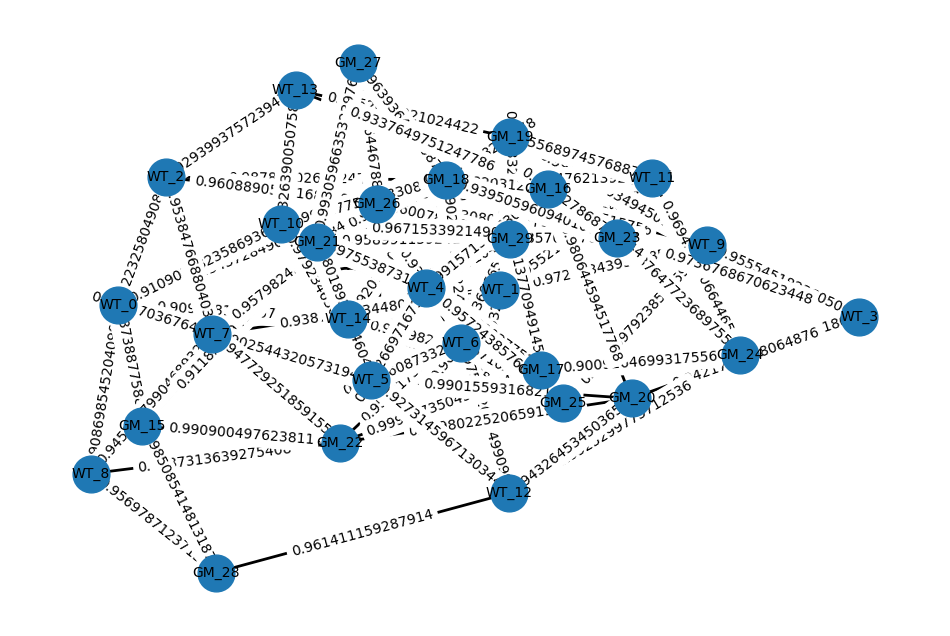

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Iterate through the DataFrame to add edges with contact probability > 0.9
for i, row in contact_matrix_df.iterrows():
    for j, prob in row.items():  # Use .items() for compatibility with future versions of pandas
        if prob > 0.9:
            G.add_edge(i, j, weight=prob)


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_size=700)

nx.draw_networkx_edges(G, pos, width=2)

nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()


## Q5 (15 points)

Compute the following three properties based on the degree (number of edges) of each node in G:
- the node with the highest degree (and its degree)
- the node with the smallest degree (and its degree)
- the average degree

In [6]:
import networkx as nx

degrees = dict(G.degree())

max_degree_node, max_degree = max(degrees.items(), key=lambda x: x[1])

min_degree_node, min_degree = min(degrees.items(), key=lambda x: x[1])

average_degree = sum(degrees.values()) / len(degrees)

print("Node with the highest degree:", max_degree_node, "Degree:", max_degree)
print("Node with the smallest degree:", min_degree_node, "Degree:", min_degree)
print("Average degree:", average_degree)


Node with the highest degree: GM_26 Degree: 13
Node with the smallest degree: GM_28 Degree: 3
Average degree: 6.4


## Q6a (10 points)

Plot the network. Use a different color for nodes belonging to each group("WT" and "GM"), and label the nodes

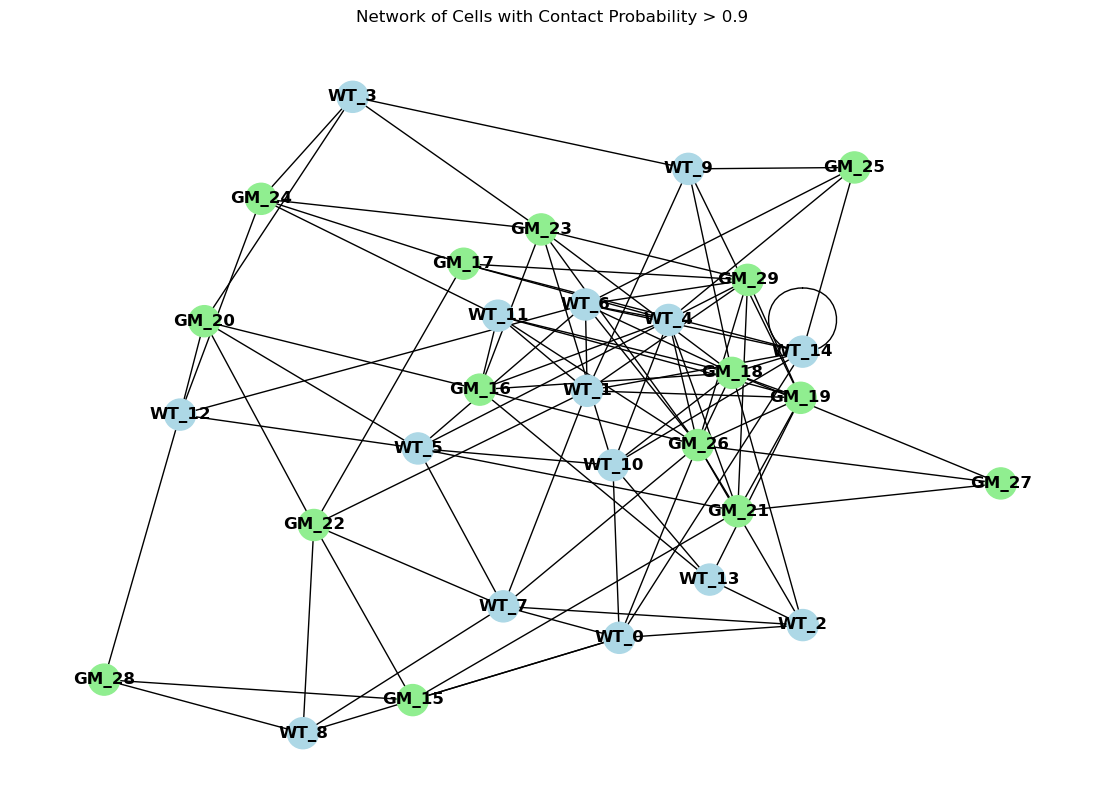

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

node_colors = ["lightblue" if node.startswith("WT") else "lightgreen" for node in G.nodes()]

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

plt.title("Network of Cells with Contact Probability > 0.9")
plt.axis('off')  
plt.show()


## Q6b (10 points)

Plot the network, with the node color changing based on their centrality.

C:\Users\paria\AppData\Local\Temp\ipykernel_16480\3195910594.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_centrality)),


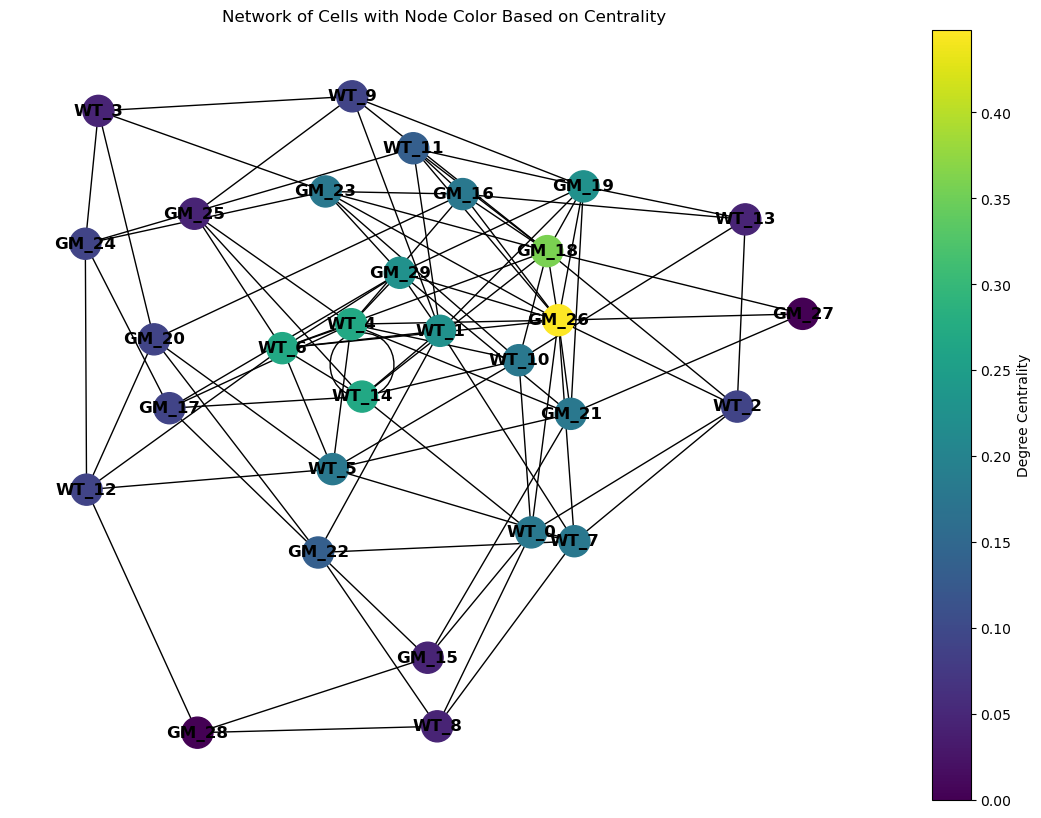

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

centrality = nx.degree_centrality(G)

max_centrality = max(centrality.values())
normalized_centrality = [centrality[node] / max_centrality for node in G.nodes()]

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_color=normalized_centrality, cmap=plt.cm.viridis, node_size=500)

nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

plt.title("Network of Cells with Node Color Based on Centrality")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_centrality)),
             label='Degree Centrality')
plt.axis('off') 
plt.show()


## Bonus question: evaluate your own answers. What grade would you give yourself?